In [6]:
# 导入必要数据库 
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import train_test_split

In [17]:
# 导入手写识别数据库 
digits = datasets.load_digits()

# 数据预处理：扁平化
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# 创建一个神经网络分类器
clf = MLPClassifier(hidden_layer_sizes=(50,20,30))

# 数据分割为训练和预测数据集
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# 进行训练
clf.fit(X_train, y_train)

# 测试数据集验证
predicted = clf.predict(X_test)
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier MLPClassifier(hidden_layer_sizes=(50, 20, 30)):
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        88
           1       0.92      0.90      0.91        91
           2       0.93      0.93      0.93        86
           3       0.94      0.88      0.91        91
           4       0.99      0.96      0.97        92
           5       0.86      0.92      0.89        91
           6       0.96      0.97      0.96        91
           7       0.95      0.91      0.93        89
           8       0.92      0.83      0.87        88
           9       0.80      0.96      0.87        92

    accuracy                           0.92       899
   macro avg       0.93      0.92      0.92       899
weighted avg       0.93      0.92      0.92       899




In [16]:
# 交叉验证
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, data, digits.target, cv=5)
scores

array([0.95      , 0.90277778, 0.95264624, 0.96100279, 0.89972145])

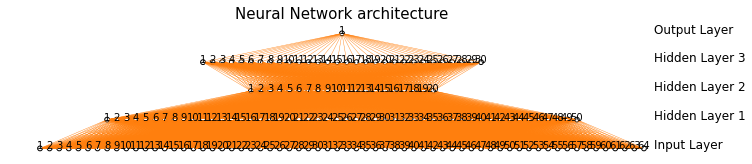

In [8]:
from VisualNN import DrawNN
import numpy as np
# 可视化神经网络，参照 https://github.com/jzliu-100/visualize-neural-network
network_structure = np.hstack(([X_train.shape[1]], np.asarray(clf.hidden_layer_sizes), 1))
network= DrawNN(network_structure)
network.draw()

array([7])

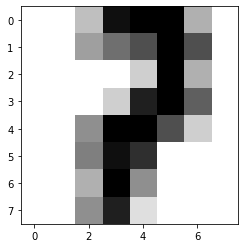

In [9]:
# 随便拿出一张图，看看神经网络识别结果
Test_input = digits.images[222]
plt.imshow(Test_input,cmap=plt.cm.gray_r, interpolation='nearest')
Test_input = Test_input.reshape((1, -1))
clf.predict(Test_input)